In [1]:
import numpy as np
import importlib
import sys
sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Parallel_Simulation')
from Data_Treatement import *
import matplotlib.pyplot as plt
media = "/media/hcleroy/Simulation_Res/Parallel_Simulation_aging/time_equilibration_Nlinker/Batch_2/"
import data_1_in
importlib.reload(data_1_in)
from data_1_in import *
from matplotlib import colormaps
cm = colormaps['viridis']

In [304]:
NAMEs = ['N3','N5','N10','N20','N30','N50','N5_L100','N10_L447','N25_L707','N10_L200','N25_L500']
N = [3,5,10,20,30,50,5,10,25,10,25]
L = [10**3,10**3,10**3,10**3,10**3,10**3,100,447,707,200,500]
NAMEs = ['N5_L100','N10_L200','N25_L500','N50']
N = [5,10,25,50]
L = [100,200,500,1000]

In [311]:
from Reader import *

In [3]:
Entropies = list()
for name in NAMEs:
    print(name)
    Entropies.append(Data_Treatement(media+name+'.hdf',data_type='Entropy'))
for NRG in Entropies:
    NRG.average(num_bins=100,log_scale=True)
for nrg in Entropies:
    print(nrg.attributes['kdiff'])

N5_L100
N10_L200
N25_L500
N50
0.001
0.001
0.001
0.001


In [4]:
NRGs = list()
for name in NAMEs:
    print(name)
    NRGs.append(Data_Treatement(media+name+'.hdf',data_type='NRG'))
for NRG in NRGs:
    NRG.average(num_bins=100,log_scale=True)
for nrg in NRGs:
    print(nrg.attributes['kdiff'])

N5_L100
N10_L200
N25_L500
N50
0.001
0.001
0.001
0.001


/home/hcleroy/anaconda3/lib/python3.8/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/hcleroy/anaconda3/lib/python3.8/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


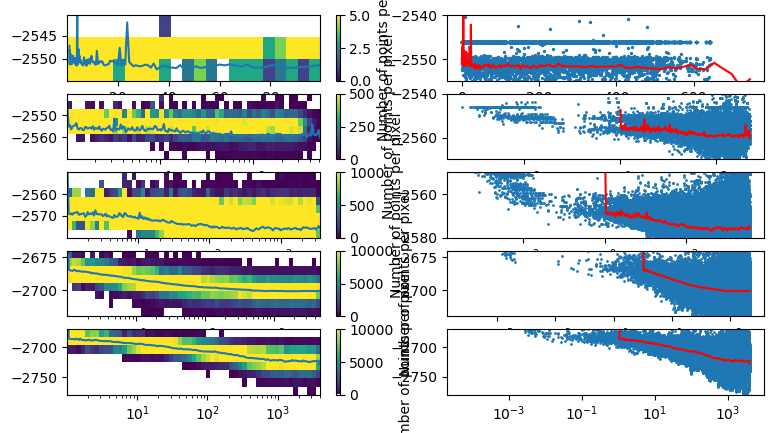

In [6]:
fig = plt.figure(figsize=(9,9))
nrows = 9
ncols = 2
ax = scatter_density(fig,NRGs[0].time[:100].astype(float).flatten(),NRGs[0].data[:100].astype(float).flatten(),nrows=nrows,ncols=ncols,pos=1,dpi=10,xlim=(0,100),ylim=(-2555,-2540),norm=True,resample=True,LogStretch=None,vmin=0,vmax=5)
ax.plot(NRGs[0].binned_time,NRGs[0].average_data)
ax = fig.add_subplot(nrows,ncols,2,projection='scatter_density')
ax.scatter(NRGs[0].time[:10].astype(float).flatten(),NRGs[0].data[:10].astype(float).flatten(),s=2.)
ax.plot(NRGs[0].binned_time,NRGs[0].average_data,color='red')
ax.set_ylim(-2555,-2540)
#XLIM=[(10**0,10**4),(10**0,10**4),(10**0,10**4),(10**0,10**4),(10**-1,10**4),(10**-1,10**4),(10**-1,10**4),(10**-1,10**4)]
#YLIM = [(-2570,-2540),(-2580,-2550),(-2720,-2670),(-3040,-2950),(-2.6*10**4,-2.53*10**4),(-2.543*10**4,-2.53*10**4),(-2.54*10**4,-2.53*10**4),(-2.57*10**4,-2.55*10**4)]
XLIM=[(10**0,10**4),(10**0,10**4),(10**0,10**4),(10**0,10**4),None]#,(10**-1,10**4)]
YLIM = [(-2570,-2540),(-2580,-2550),(-2720,-2670),(-2780,-2670),None]#,(-3040,-2950)]
VMAX = [500,1000,10000,10**4,None,None,None,None]
RESAMPLE = [True,True,True,True,False,True,True,True]
for n,nrg in enumerate(NRGs[1:]):
    X,Y = nrg.time[:100].astype(float).flatten(),nrg.data[:100].astype(float).flatten()    
    ax = scatter_density(fig,X,Y,nrows=nrows,ncols=ncols,pos=2*n+3,dpi=25,resample=RESAMPLE[n],xlim=XLIM[n],ylim=YLIM[n],vmin=0,vmax=VMAX[n],norm=True)
    ax.plot(NRGs[n+1].binned_time,NRGs[n+1].average_data)
    ax.set_xscale('log')
    ax = fig.add_subplot(nrows,ncols,2*n+4,projection='scatter_density')
    ax.set_xscale('log')
    ax.scatter(X,Y,s=1)
    ax.set_ylim(YLIM[n])
    ax.plot(NRGs[n+1].binned_time,NRGs[n+1].average_data,color='red')


In [302]:
Fmax = lambda N,L, E : -1.5*((N-1)*np.log(3*(N-1)/(2*np.pi*L)) -  1)-L*np.log(4*np.pi)+E*N
Fmin = lambda N,L,E :  -1.5*(N-1)*(np.log(3*(N-1)/(2*np.pi*L)) - 2/3)-L*np.log(4*np.pi)+E*N
Finitial = lambda N,L,E: E*N - 1.5*((N-1)*np.log((3*(N+1))/(2*np.pi*L))  - (N+1)/(2*(N-1)))#-2*np.log(4*np.pi)
#Finitial = lambda N,L,E: E*N - 1.5*((N-1)*np.log((3*(N+1))/(2*np.pi*L))) - (N-1)
#Finitial = lambda N,L,E: E*N - 1.5*(N-1)*(np.log((3*(N+1))/(np.pi*L))  - 1)
#Finitial = lambda N,L,E: E*N - 1.5*((N-1)*np.log((3*(N))/(2*np.pi*L))  - (N-1)/(2*(N)))-np.log(4*np.pi)
Sfree = lambda L : L*np.log(4*np.pi)
print(Fmax(50,1000,-15))
print(Fmin(50,1000,-15))
print(Finitial(50,1000,-15) -1000*np.log(4*np.pi))

-3003.517064711254
-2956.017064711254
-3007.176844560463


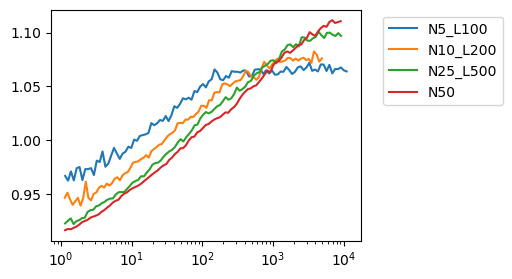

In [303]:
fig,ax = plt.subplots(ncols=1,figsize=(4,3))
i = 1
n=0
for Entropy,NRG in zip(Entropies,NRGs):#[i:i+1]):
    #ax[0].plot(NRG.binned_time,NRG.average_data/NRG.attributes['ell_tot'],label=NAMEs[n])
    #X,Y =NRG.binned_time,NRG.average_data
    #X,Y = NRG.curate_data(1,-1,window_size=10)
    X,Y = NRG.binned_time[1:],NRG.average_data[1:]-Entropy.average_data[1:]
    #ax.plot(X[i:],(Y[i:]-min(Y[i:]))/(max(Y[i:])-min(Y[i:])),label=NAMEs[n])
    ax.plot(X,(Y+Sfree(L[n]))/Finitial(N[n],L[n],-15),label=NAMEs[n])
    n+=1
ax.set_xscale('log')
#ax.set_ylim(-3.1,-2.9)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
#ax.scatter(time_shift,[0 for _ in range(time_shift.shape[0])])

In [2]:
NAMEs = ['N5_L100','N10_L200','N25_L500','N50']
N = [5,10,25,50]
L = [100,200,500,1000]
Clusters = list()
for name in NAMEs:
    print(name)
    Clusters.append(Data_Treatement(media+name+'.hdf',data_type='cluster'))
for cluster in Clusters:
    cluster.average(num_bins=100,log_scale=True)

N5_L100
N10_L200
N25_L500
N50


In [5]:
times = list()
for name in NAMEs:
    times.append(Data_Treatement(media+name+'.hdf',data_type='Time_shift'))
time_shift = np.mean(times[-1].data,axis=0)

/tmp/ipykernel_16716/182527921.py:13: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[0].set_xlim(0,100000)


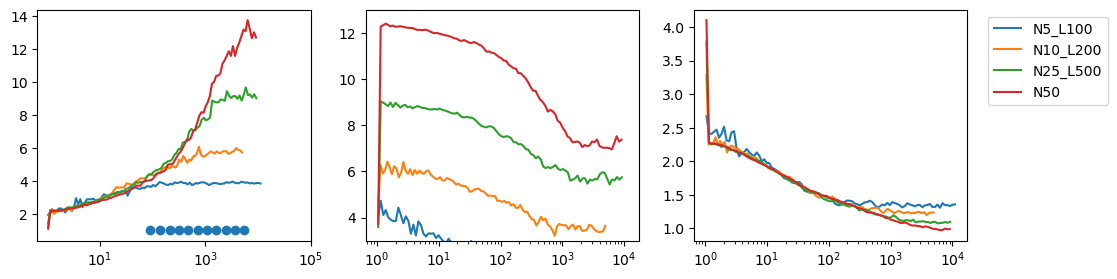

In [6]:
fig,ax = plt.subplots(ncols=3,figsize=(12,3))
i = 0
n=0
for cluster  in Clusters:
    X,Y = cluster.binned_time,cluster.average_data
    for i in range(3):
        ax[i].plot(X,Y[:,i],label=NAMEs[n])
    #ax.plot(X[i:],(Y[i:]-min(Y[i:]))/(max(Y[i:])-min(Y[i:])),label=NAMEs[n])
    n+=1
for i in range(3):
    ax[i].set_xscale('log')
ax[1].set_ylim(3,13)
ax[0].set_xlim(0,100000)
ax[2].legend(loc='upper left', bbox_to_anchor=(1.05, 1))
ax[0].scatter(time_shift,[1 for _ in range(time_shift.shape[0])])

[0.39070121 0.85060067 0.84996159 0.84028955 0.81783377 0.81574052
 0.77739094 0.76096002 0.7535308  0.73397375 0.70034987 0.70786962]


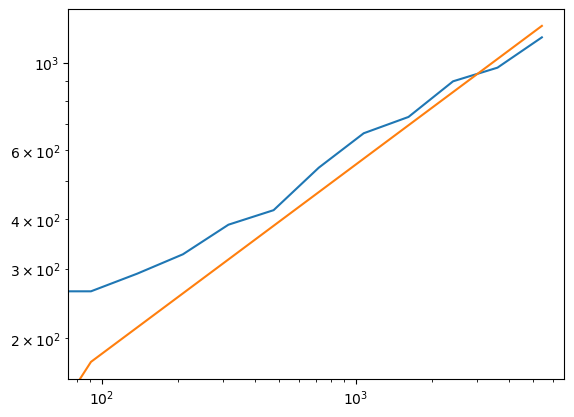

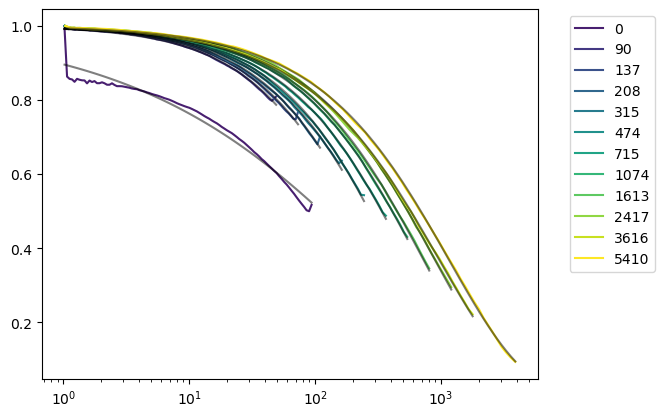

In [50]:
ISFs[-1].binned_time.shape[0]

12